In [1]:

from datalog.models.table import Table, TableId
from random_word import RandomWords
import random

r = RandomWords()

tables = []
schema = r.get_random_word()
for i in range(random.randint(10, 16)):
    name = r.get_random_word()
    predecessor = None
    if tables:
        predecessor = random.choice(tables)
    tables.append(Table(
        id=TableId(name, schema),
        name=name,
        schema=schema,
        columns=set(r.get_random_word() for j in range(random.randint(1, 10))),
        direct_ancestors=set() if not predecessor else {TableId(predecessor.name, predecessor.schema)}
    ))

tables

[Table(id=TableId(name='coseiest', schema='umbrous'), name='coseiest', schema='umbrous', columns={'undeck', 'tinhorn', 'melchite', 'decrescendos', 'unbeteared', 'cradlesong', 'unadministrative'}, description=None, load_sql=None, direct_ancestors=set(), _search_expr=None),
 Table(id=TableId(name='estreats', schema='umbrous'), name='estreats', schema='umbrous', columns={'tenpounder', 'algology', 'endplay'}, description=None, load_sql=None, direct_ancestors={TableId(name='coseiest', schema='umbrous')}, _search_expr=None),
 Table(id=TableId(name='bushbeater', schema='umbrous'), name='bushbeater', schema='umbrous', columns={'ghostlike', 'anahau', 'zootrophy', 'fisticuffs', 'askeses'}, description=None, load_sql=None, direct_ancestors={TableId(name='estreats', schema='umbrous')}, _search_expr=None),
 Table(id=TableId(name='vertebraless', schema='umbrous'), name='vertebraless', schema='umbrous', columns={'purser', 'vibrate', 'nonreliance', 'shone', 'cocle', 'navigators'}, description=None, lo

In [2]:
from datalog.application.catalog import Catalog

table_mapping = {t.id : t for t in tables}
ctlg = Catalog(tables=table_mapping)

table_mapping

{TableId(name='coseiest', schema='umbrous'): Table(id=TableId(name='coseiest', schema='umbrous'), name='coseiest', schema='umbrous', columns={'undeck', 'tinhorn', 'melchite', 'decrescendos', 'unbeteared', 'cradlesong', 'unadministrative'}, description=None, load_sql=None, direct_ancestors=set(), _search_expr=None),
 TableId(name='estreats', schema='umbrous'): Table(id=TableId(name='estreats', schema='umbrous'), name='estreats', schema='umbrous', columns={'tenpounder', 'algology', 'endplay'}, description=None, load_sql=None, direct_ancestors={TableId(name='coseiest', schema='umbrous')}, _search_expr=None),
 TableId(name='bushbeater', schema='umbrous'): Table(id=TableId(name='bushbeater', schema='umbrous'), name='bushbeater', schema='umbrous', columns={'ghostlike', 'anahau', 'zootrophy', 'fisticuffs', 'askeses'}, description=None, load_sql=None, direct_ancestors={TableId(name='estreats', schema='umbrous')}, _search_expr=None),
 TableId(name='vertebraless', schema='umbrous'): Table(id=Tab

In [3]:
from datalog.domain.dependency_graph import DependencyGraph

dg = DependencyGraph(table_mapping)
dg.generate()

TableId(name='coseiest', schema='umbrous') set()
TableId(name='estreats', schema='umbrous') {TableId(name='coseiest', schema='umbrous')}
TableId(name='bushbeater', schema='umbrous') {TableId(name='estreats', schema='umbrous')}
TableId(name='vertebraless', schema='umbrous') {TableId(name='estreats', schema='umbrous')}
TableId(name='eyrir', schema='umbrous') {TableId(name='vertebraless', schema='umbrous')}
TableId(name='disappearance', schema='umbrous') {TableId(name='bushbeater', schema='umbrous')}
TableId(name='pseudovary', schema='umbrous') {TableId(name='eyrir', schema='umbrous')}
TableId(name='gents', schema='umbrous') {TableId(name='coseiest', schema='umbrous')}
TableId(name='homiliary', schema='umbrous') {TableId(name='estreats', schema='umbrous')}
TableId(name='isostasy', schema='umbrous') {TableId(name='eyrir', schema='umbrous')}


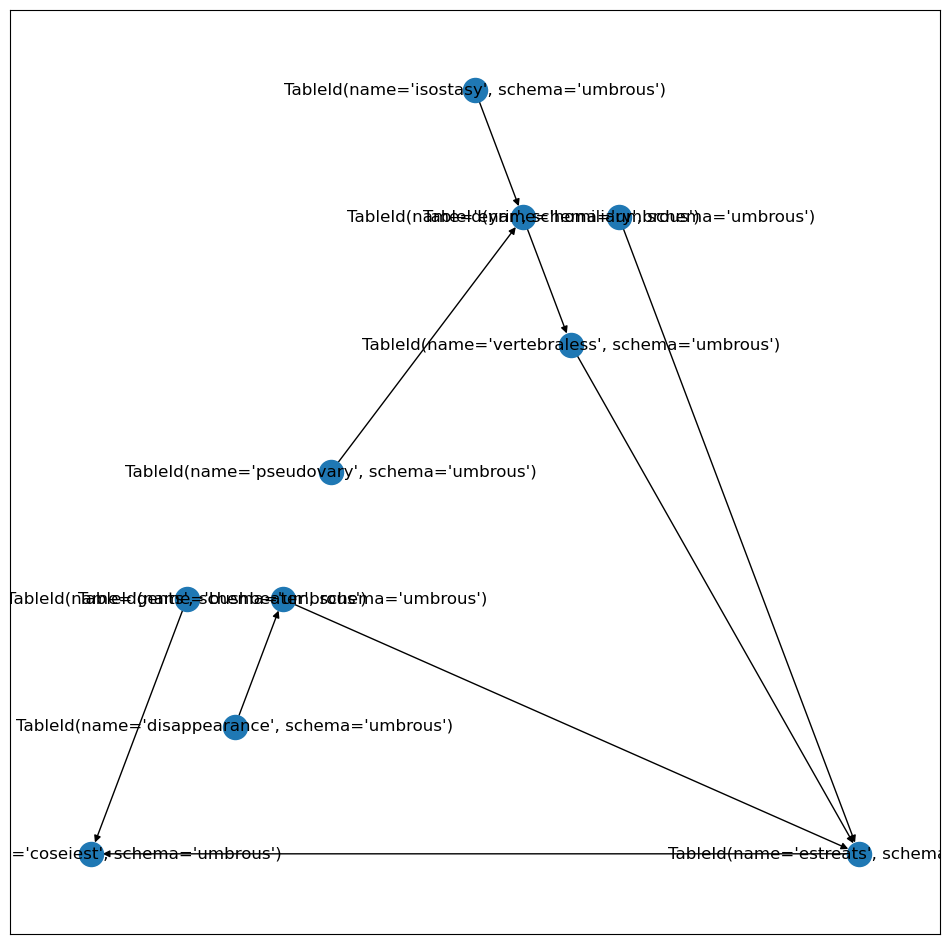

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(3,figsize=(12,12))
nx.draw_networkx(dg._graph, pos=nx.planar_layout(dg._graph), with_labels=True)

In [17]:
dg.get_upstream(TableId('estreats', 'umbrous'))

[(TableId(name='coseiest', schema='umbrous'),
  TableId(name='estreats', schema='umbrous'))]